In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')

In [3]:
Data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/MovieGenre.csv')

In [4]:
Data

,id,text,genre
0,0,"eady dead, maybe even wishing he was. INT. 2ND...",thriller
1,2,"t, summa cum laude and all. And I'm about to l...",comedy
2,3,"up Come, I have a surprise.... She takes him ...",drama
3,4,ded by the two detectives. INT. JEFF'S APARTME...,thriller
4,5,"nd dismounts, just as the other children reach...",drama
...,...,...,...
22574,28161,n in the world to decide what I'm going to do ...,drama
22575,28162,shards. BOJO LAZ! Laz pushes Deke back through...,drama
22576,28163,"OTTIE You've got a thing about Ernie's, haven'...",thriller
22577,28165,....with marked skill and dexterity . LANA wry...,action


In [5]:
Data.drop('id',axis=1,inplace=True)

In [6]:
Data.rename(columns={'text':'Text','genre':'Genre'},inplace=True)

In [7]:
Data

,Text,Genre
0,"eady dead, maybe even wishing he was. INT. 2ND...",thriller
1,"t, summa cum laude and all. And I'm about to l...",comedy
2,"up Come, I have a surprise.... She takes him ...",drama
3,ded by the two detectives. INT. JEFF'S APARTME...,thriller
4,"nd dismounts, just as the other children reach...",drama
...,...,...
22574,n in the world to decide what I'm going to do ...,drama
22575,shards. BOJO LAZ! Laz pushes Deke back through...,drama
22576,"OTTIE You've got a thing about Ernie's, haven'...",thriller
22577,....with marked skill and dexterity . LANA wry...,action


In [8]:
Data.isnull().sum()

Text     0
Genre    0
dtype: int64

In [9]:
Data['Genre'].unique()

array(['thriller', 'comedy', 'drama', 'action', 'sci-fi', 'other',
       'romance', 'horror', 'adventure'], dtype=object)

In [10]:
Data['Genre'].value_counts()

drama        8873
thriller     6824
comedy       2941
action       2392
sci-fi        613
horror        456
other         270
adventure     147
romance        63
Name: Genre, dtype: int64

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


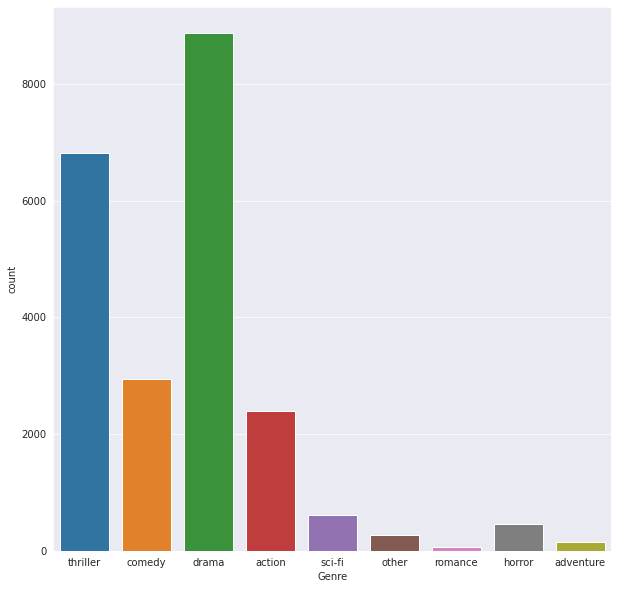

In [11]:
plt.figure(figsize=(10,10))
sns.countplot(Data['Genre'])

In [12]:
Genre_Mapper = {'other': 0, 'action': 1, 'adventure': 2, 'comedy':3, 'drama':4, 'horror':5, 'romance':6, 'sci-fi':7, 'thriller': 8}
Data['Genre'] = Data['Genre'].map(Genre_Mapper)

In [13]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
import re

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [14]:
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords

In [15]:
Data.shape

(22579, 2)

In [16]:
Corpus=[]
Stemmer=PorterStemmer()
Lemmatizer=WordNetLemmatizer()

In [17]:
for i in range(0,Data.shape[0]):
    Review=re.sub('[^a-zA-Z]',' ',Data['Text'][i])
    Review=Review.lower()
    Review=Review.split() 
    Review=[Lemmatizer.lemmatize(Word) for Word in Review if Word not in set(stopwords.words('english'))]
    Review=' '.join(Review)
    Corpus.append(Review)

In [18]:
Corpus[0:15]

['eady dead maybe even wishing int nd floor hallway three night orderly lead liza door orderly white guy open door step room three white guy mid look wild straight jacketed jerry liza reached end rope shake head int decrepit hospital room night balled fetal really head pressed cement try sing jerry blue moon blue moon int nd floor hallway three night liza stand leaning rail wall orderly sure going know bad orderly okay liza start hall orderly following orderly got new patient last week want see liza wave hopeless stop chicken wired window end hall look light break jerry somewhere orderly look gotta get back work',
 'summa cum laude launch brand new magazine called exposed homage miss julie conroy xenia ohio julie grin julie know find excellent editor chief ted yellow page julie let finger walking suddenly music change people ted grin ted playing song extending hand dare ask dance julie taking hand better ted julie begin dancing kissing b g charlie jimmy feign tear charlie sucker happy 

In [19]:
Data['Genre']

0        8
1        3
2        4
3        8
4        4
        ..
22574    4
22575    4
22576    8
22577    1
22578    3
Name: Genre, Length: 22579, dtype: int64

In [20]:
Data['Genre']==4

0        False
1        False
2         True
3        False
4         True
         ...  
22574     True
22575     True
22576    False
22577    False
22578    False
Name: Genre, Length: 22579, dtype: bool

In [21]:
# DRAMA
Data[Data['Genre']==4].index

Int64Index([    2,     4,     7,    10,    11,    12,    13,    14,    15,
               16,
            ...
            22553, 22560, 22561, 22563, 22564, 22567, 22568, 22571, 22574,
            22575],
           dtype='int64', length=8873)

In [22]:
# THRILLER
Data[Data['Genre']==8].index

Int64Index([    0,     3,     5,     6,     8,    18,    24,    26,    31,
               34,
            ...
            22539, 22540, 22543, 22545, 22546, 22558, 22565, 22570, 22572,
            22576],
           dtype='int64', length=6824)

In [23]:
# COMEDY
Data[Data['Genre']==3].index

Int64Index([    1,    20,    25,    29,    30,    33,    39,    44,    54,
               73,
            ...
            22519, 22523, 22528, 22532, 22542, 22552, 22554, 22556, 22562,
            22578],
           dtype='int64', length=2941)

In [24]:
List=list(Data[Data['Genre']==4].index)

In [25]:
# DRAMA
Drama=[]
for i in list(Data[Data['Genre']==4].index):
  Drama.append(Corpus[i])

In [26]:
Drama[1]

'nd dismount child reach throw arm embracing charlotte hurry behind martin lock eye enveloped hug child ext fresh water plantation evening summer oak tree covered leaf martin house partially rebuilt habitable workshop already completed martin child nathan samuel margaret william play tall grass front house two great dane charlotte sits front porch nursing infant martin walk workshop trailed susan carry completed rocking chair chair work art thin light spider web perfectly turned wood nail glue step onto porch next charlotte place rocking chair next martin two pound fourteen ounce charlotte lovely smile make minute adjustment chair position sits settle back'

In [27]:
Drama_Word=''
for i in range(0,5):
  Drama_Word+=Drama[i]

In [28]:
Drama_Word

'come surprise take hand lead hallway salvatore look feel pang seems smaller age withers body slightly stooped hair gathered knot back head must tired want rest time funeral salvatore interrupting mamma take hour air know maria smiling ironically tell year salvatore get message feel guilty thinking seems incredible never come maria open door step aside let son whisper put thing go go salvatore lake step flabbergasted sight old room perfectly reconstructed preserved look like museum museum past despite bed clothes cupboard book shelf perfectly clear one ever livednd dismount child reach throw arm embracing charlotte hurry behind martin lock eye enveloped hug child ext fresh water plantation evening summer oak tree covered leaf martin house partially rebuilt habitable workshop already completed martin child nathan samuel margaret william play tall grass front house two great dane charlotte sits front porch nursing infant martin walk workshop trailed susan carry completed rocking chair ch

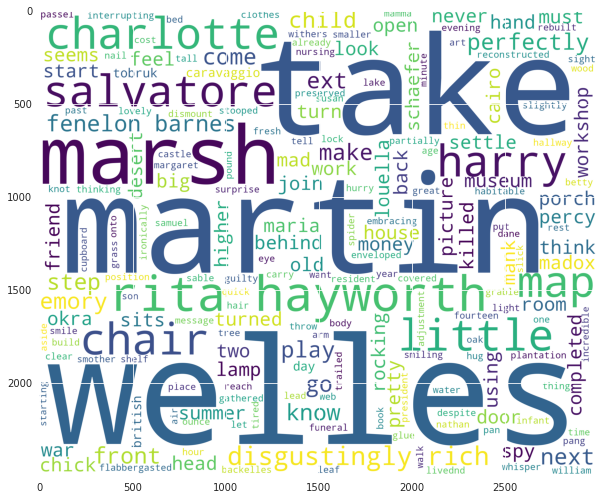

In [29]:
from wordcloud import WordCloud
WordCloud=WordCloud(background_color='white', width=3000, height=2500).generate(Drama_Word)
plt.figure(figsize=(10,10))
plt.imshow(WordCloud)

In [30]:
from sklearn.feature_extraction.text import CountVectorizer
CV = CountVectorizer(max_features=10000, ngram_range=(1,2))

In [31]:
X=CV.fit_transform(Corpus).toarray()

In [32]:
y=Data['Genre'].values

In [33]:
X.shape,y.shape

((22579, 10000), (22579,))

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [35]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [36]:
# HYPERPARAMETER TUNING
for i in np.arange(0.1,1.1,0.1):
  NB = MultinomialNB(alpha=i)
  NB.fit(X_train, y_train)
  Prediction = NB.predict(X_test)
  Accuracy = accuracy_score(y_test,Prediction)
  print("Accuracy Score for Alpha = {} is: {}%".format(round(i,1), round(Accuracy*100,2)))

Accuracy Score for Alpha = 0.1 is: 91.59%
Accuracy Score for Alpha = 0.2 is: 91.16%
Accuracy Score for Alpha = 0.3 is: 90.92%
Accuracy Score for Alpha = 0.4 is: 90.66%
Accuracy Score for Alpha = 0.5 is: 90.41%
Accuracy Score for Alpha = 0.6 is: 90.28%
Accuracy Score for Alpha = 0.7 is: 90.04%
Accuracy Score for Alpha = 0.8 is: 89.9%
Accuracy Score for Alpha = 0.9 is: 89.86%
Accuracy Score for Alpha = 1.0 is: 89.95%


In [37]:
NB=MultinomialNB(alpha=0.1)

In [38]:
NB.fit(X_train,y_train)

MultinomialNB(alpha=0.1, class_prior=None, fit_prior=True)

In [39]:
y_pred=NB.predict(X_test)

In [40]:
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.9158547387068202
[[  63    0    0    0    2    0    0    0    1]
 [   1  446    0    9    9    1    0    0    7]
 [   0    1   23    0    1    0    0    0    0]
 [   0    5    0  578   31    1    0    2   18]
 [   1   32    0   30 1583    5    0    2   75]
 [   0    1    0    2    2   77    0    0    2]
 [   0    0    0    0    0    0   12    0    0]
 [   0    2    0    0    1    0    0   97    6]
 [   1   13    0   18   84    3    0   11 1257]]
              precision    recall  f1-score   support

           0       0.95      0.95      0.95        66
           1       0.89      0.94      0.92       473
           2       1.00      0.92      0.96        25
           3       0.91      0.91      0.91       635
           4       0.92      0.92      0.92      1728
           5       0.89      0.92      0.90        84
           6       1.00      1.00      1.00        12
           7       0.87      0.92      0.89       106
           8       0.92      0.91      0.91      1387

    ac

In [41]:
def Genre(Sample_Script):
    Script=re.sub('[^a-zA-Z]',' ',Sample_Script)
    Script=Script.lower()
    Script=Script.split()     
    Script=[Lemmatizer.lemmatize(Word) for Word in Script if Word not in set(stopwords.words('english'))]
    Script=' '.join(Script)

    Temp=CV.transform([Script]).toarray()
    return NB.predict(Temp)[0]


In [42]:
Sample_Script="I'm sorry about that. Staring in her eyes. Even Julianne has run out of words. DIGGER Tell him you know this is the worst, dumbest, cruelest moment to do this to him. But there it is, and he has to choose. JULIANNE And what will he do? Digger isn't smiling. His voice low, beneath the crowd... DIGGER He'll choose Kim. You'll stand by her at her wedding. You'll kiss him good bye. And you'll go home. He holds up one finger. Almost touching her nose. DIGGER This is what you've come to do. Now do it. Wow. She looks frightened and moved, all at the same time. She kisses him on the lips. And walks away. He watches her go through the crowd. Take Michael's hand. Lead him back toward the taxi. EXT. SKYLINE CRUISE BOAT DAY The skyline of Chicago moves past us. Slowly. The NBC Tower, Cityfront Center... MICHAEL O.S. Big weddings are so strange. JULIANNE O.S. You keep saying that. Up ahead, the Wrigley Building draws closer... MICHAEL O.S. Kim has all this stuff to do, I hardly see her. JULIANNE"
Value=Genre(Sample_Script)

In [43]:
Value

3

In [44]:
print('Prediction: {}'.format(list(Genre_Mapper.keys())[Value]))

Prediction: comedy
